Last review: Jan 2024

# Basics of tensors

This lab is based on material from Chapter 2 of [D2L (Classic version)](https://classic.d2l.ai/)

- Data manipulation
- Operations on tensors
- Pandas: reading in data, handling missing values, converting variables to tensors
- Automatic differentiation with `autograd` package

## What is PyTorch?

It’s a Python based scientific computing package targeted at two sets of audiences:

-  Tensorial library that uses the power of GPUs
-  A deep learning research platform that provides maximum flexibility and speed

Import the PyTorch library

In [1]:
import torch

### Activity 1: Data manipulation

Referring to Section 2.1.1, complete the following tasks:

1.1(a) Using `arange` create a vector (1-dimensional tensor) of 6 evenly spaced values from 0 to 5. Name the vector x. Print x.
Repeat but use `torch.tensor` instead of `arange`.

In [2]:
#1a
x = torch.arange(6)
print(x)
y = torch.tensor([0,1,2,3,4,5])
print(y)

tensor([0, 1, 2, 3, 4, 5])
tensor([0, 1, 2, 3, 4, 5])


To get help with a function use `?` (or do a web search) for example to see documentation for `torch.tensor`:

In [3]:
torch.tensor?

Docstring:
tensor(data, *, dtype=None, device=None, requires_grad=False, pin_memory=False) -> Tensor

Constructs a tensor with no autograd history (also known as a "leaf tensor", see :doc:`/notes/autograd`) by copying :attr:`data`.

.. warning::

    When working with tensors prefer using :func:`torch.Tensor.clone`,
    :func:`torch.Tensor.detach`, and :func:`torch.Tensor.requires_grad_` for
    readability. Letting `t` be a tensor, ``torch.tensor(t)`` is equivalent to
    ``t.clone().detach()``, and ``torch.tensor(t, requires_grad=True)``
    is equivalent to ``t.clone().detach().requires_grad_(True)``.

.. seealso::

    :func:`torch.as_tensor` preserves autograd history and avoids copies where possible.
    :func:`torch.from_numpy` creates a tensor that shares storage with a NumPy array.

Args:
    data (array_like): Initial data for the tensor. Can be a list, tuple,
        NumPy ``ndarray``, scalar, and other types.

Keyword args:
    dtype (:class:`torch.dtype`, optional): the de

1.1(b) Using `arange` create tensor from -1.5 to 2.5 with each having a space of 0.5

In [4]:
# You can use torch.tensor, but more efficient to do with with torch.arange
torch.arange(-1.5, 3.0001, 0.5)

tensor([-1.5000, -1.0000, -0.5000,  0.0000,  0.5000,  1.0000,  1.5000,  2.0000,
         2.5000,  3.0000])

1.1(c) Refer to the documentation for [`torch.one_like()`](https://pytorch.org/docs/stable/generated/torch.ones_like.html) to understand the following output of the code:

In [5]:
print(x)
torch.ones_like(x)

tensor([0, 1, 2, 3, 4, 5])


tensor([1, 1, 1, 1, 1, 1])

1.2(a) Apply the function `len` and `shape` to x. What do these output?(And how is this related to the dimension of the vector x? (see page 55))

In [6]:
#2a
print(f" Lenth: {len(x)}") # returns number of elements

# shape is an attribute of a tensor.
print(f"Shape: {x.shape}") # length along each axis (only 1 axis)

#Common error made by students: shape(x)
# shape is part of numpy, so you need to
# import numpy as np
# Then
# np.shape(x)

# (p.55) Note that the word “dimension” tends to get overloaded in these contexts and this tends to confuse
# people. To clarify, we use the **dimensionality of a vector or an axis** to refer to its length, i.e., the
# number of elements of a vector or an axis. However, we use the **dimensionality of a tensor** to refer
# to the number of axes that a tensor has.

 Lenth: 6
Shape: torch.Size([6])


1.2(b) What's the difference between `torch.tensor(2)` and `torch.tensor([2])`. Look at their shapes.

In [7]:
print(torch.tensor(2).shape) # this is rank 0 tensor. It is a scalar
print(torch.tensor([2]).shape) # 1d tensor
print(torch.tensor([[2]]).shape)
print(torch.tensor([[[2]]]).shape)

torch.Size([])
torch.Size([1])
torch.Size([1, 1])
torch.Size([1, 1, 1])


`torch.flatten()` can reduce the dimensionality of a tensor if in some place it has dimension 1.
It also works for scalers.

In [8]:
test_x = torch.tensor([[2]])
print(test_x.shape)
test_y = torch.flatten(test_x)
print(test_y.shape)

test_scaler = torch.tensor(2)
print(torch.flatten(test_scaler).shape)
print(test_scaler)

test_xx = torch.tensor([[[[[2]]]]])
print(test_xx.shape)
print(torch.flatten(test_xx).shape)

torch.Size([1, 1])
torch.Size([1])
torch.Size([1])
tensor(2)
torch.Size([1, 1, 1, 1, 1])
torch.Size([1])


1.2(c) Study the code below. What is the purpose of `dtype=torch.float32`?

In [9]:
x = torch.arange(6)
x2 = torch.arange(6, dtype=torch.float32)
print(x)
print(x2)
x == x2

tensor([0, 1, 2, 3, 4, 5])
tensor([0., 1., 2., 3., 4., 5.])


tensor([True, True, True, True, True, True])

1.3(a) Use the `reshape` function to change the shape of the tensor x from a row vector to a matrix (2d tensor) with shape 2 rows and 3 columns, .i.e shape (2,3). Call it X. Print X. How many axes are there?

In [10]:
#3a
X = x.reshape(2,3)
print(X)
## axes=2

tensor([[0, 1, 2],
        [3, 4, 5]])


In [11]:
print(x)

x.reshape(2,3)
print(x)

tensor([0, 1, 2, 3, 4, 5])
tensor([0, 1, 2, 3, 4, 5])


1.3(b) Look up `torch.view` to understand the following:

In [12]:
print(x.view(2,3).view(-1,2))

xxx = x.view(2,3)
#torch.view comes in very handy as we do
# not need to keep track of the size of 2 axes.
# just give it one, and set the other to -1 and it will
# figure it out.

print(x)
print(xxx)


tensor([[0, 1],
        [2, 3],
        [4, 5]])
tensor([0, 1, 2, 3, 4, 5])
tensor([[0, 1, 2],
        [3, 4, 5]])


In [13]:
test_x = torch.arange(24)
test_x.reshape(2,-1,4)

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

1.4 How is the `-1` used in the reshape function? Repeat question 3a but using `-1` as one of the arguments.

In [14]:
#4
X=x.reshape(-1,3) # -1 may apear in either of the two arguments
print(X)

tensor([[0, 1, 2],
        [3, 4, 5]])


1.5 (Relating to Question 4) Without running code what will be the ouput of `x.reshape(-1,-1)`?  And for  `x.reshape(-1,4)`?

In [15]:
#5
# x.reshape(-1,-1) need to know at least one of the number of rows, columns to figure out the other.
# x.reshape(-1,,4) returns error as shape does not match size of 6

At this point you may be thinking that `view` and `reshape` are the same thing. Well there is a subtle difference, which you can read about on [Stackoverflow](https://stackoverflow.com/questions/49643225/whats-the-difference-between-reshape-and-view-in-pytorch), but doesn't matter for us. In DL you will see `view` is more commonly used.


1.6 First, create a tensor with shape (3,5) whose elements are sampled from a standard normal distribution. Verify that when you run the same code you should get different numbers. Next, use `torch.manual_seed()` to get identical random draws to the tensor you created.

In [16]:
torch.manual_seed(22)
torch.randn(3,5)

# why set the seed?
# Only makes a difference if our procedures involve
# random sampling, such as sampling from some statistical distribution.
# Setting the seed allows others to reproduce your results - which you
# may have reported in a published paper. Reproducibility is important.

tensor([[ 1.0302, -0.5073, -0.1017,  1.3587, -3.0745],
        [-0.7659,  0.7240,  0.2416, -1.5601,  1.3164],
        [-0.8576, -0.3336, -2.5873, -0.1829, -0.4056]])

### Activity 2: Operations on tensors


2.1.(Section 2.1.2) Create the following 2x5 matrices whose:

- values are integers from 0 to 9. Use `arange`, and have as one of the arguments `-1` in `reshape`. Call the matrix A.

- values are drawn from a standard normal distribution and call it B

- elements are zero and call it C

- elements are ones and call it D

a. raise each element of A to the power 2.

b. Concatenate D on top of C on axis=0 get a $4\times 5$ matrix and print the result.

c. Concatenate D and C on axis 1 to get a $2\times 10$ matrix and print the result.


In [17]:
#1.
A=torch.arange(10, dtype=torch.float32).reshape(-1,5)
B=torch.randn(2,5,dtype=torch.float32)
C=torch.zeros(2,5,dtype=torch.float32)
D=torch.ones((2,5))

A**2 # element-wise operation
print(A**2)
print(torch.cat((D,C),axis=0))
torch.cat((D,C),axis=1)

tensor([[ 0.,  1.,  4.,  9., 16.],
        [25., 36., 49., 64., 81.]])
tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


tensor([[1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 0., 0., 0., 0., 0.]])

2.2(a) (Section 2.1.3) Add a scalar,say 10, to matrix A. Print the result, and explain what operation has been performed.

In [18]:
#2a
#Broadcasting mechanism is applied
# Note, not all function support broadcasting - torch.mm does not for example.
print(A)
print(A+10)

print(A + 10 * torch.ones_like(A))

tensor([[0., 1., 2., 3., 4.],
        [5., 6., 7., 8., 9.]])
tensor([[10., 11., 12., 13., 14.],
        [15., 16., 17., 18., 19.]])
tensor([[10., 11., 12., 13., 14.],
        [15., 16., 17., 18., 19.]])


2.2(b) Add a vector `b=(6,0,2,-3.2,5)` to matrix A. Before writing the code, what do you expect will be the output? Verify it.
In the output, why are there a bunch of zeros after the decimal place?

In [19]:
b=torch.tensor([6,0,2,-3.2,5])
A+b

tensor([[ 6.0000,  1.0000,  4.0000, -0.2000,  9.0000],
        [11.0000,  6.0000,  9.0000,  4.8000, 14.0000]])

In [20]:
c = torch.tensor([[1], [20]])
c

print(A+c)

tensor([[ 1.,  2.,  3.,  4.,  5.],
        [25., 26., 27., 28., 29.]])


2.2(c) (This question is a useful reference for softmax regression.) What does `argmax(axis=1)` and `max` do when applied to the matrix `A`? See the following application of the two functions.  

In [21]:
print(A)
print(A.argmax(axis=1)) # in each row, which is the max
print(A.max())

tensor([[0., 1., 2., 3., 4.],
        [5., 6., 7., 8., 9.]])
tensor([4, 4])
tensor(9.)


Solution to 2c. `argmax(axis=1)` returns the index corresponding to the largest value per row; `max` returns the largest value in the matrix `A`.

2.2(d) The following code returns and error. Correct it. (Hint: see Activity 1)

In [22]:
print(A.sum())
print(A.mean())

tensor(45.)
tensor(4.5000)


2.2(e) (This question is a useful reference for convoluational neural nets.) The following code multiplies matrices F and G. Without running the code, what are the outputs?
run the code to verify your answer.

In [23]:
F=torch.tensor([[1,1],[1,1]])
G=torch.tensor([[2,3],[5,7]])

#What are the outputs to:
print(F*G)
print(F*G.sum()) # equivalent to print(F* ( G.sum() ) )
print((F*G).sum())

l = (F-G)**2
print(f'l is {l}')
print(l.sum())

tensor([[2, 3],
        [5, 7]])
tensor([[17, 17],
        [17, 17]])
tensor(17)
l is tensor([[ 1,  4],
        [16, 36]])
tensor(57)


2.3 (Section 2.1.4)

a. Write code to obtain the following element(s) of matrix A:

- First row

- Last row

- row 2 column 2 element

- third column

In [24]:
print(A)
print(f"\n1st row is {A[0]} \n")
print(f"last row is {A[-1]} \n")
print(f"(2,2) element is {A[1,1]}\n")
print(f"3rd column is {A[:,2]}")


tensor([[0., 1., 2., 3., 4.],
        [5., 6., 7., 8., 9.]])

1st row is tensor([0., 1., 2., 3., 4.]) 

last row is tensor([5., 6., 7., 8., 9.]) 

(2,2) element is 6.0

3rd column is tensor([2., 7.])


b. (3d tensor) Create a tensor with integers from 0 to 7 where there are 2 blocks of 2x2 matrices. Use `arange` and `reshape`. Call it E.

- How many axes does this tensor have?

- Display the 2nd element which is a matrix

- Without using code, what will be returned by the code E[0,1,0]? Verify by running the code.

- Write the code that will output from E the tensor [4,5].

In [25]:
E = torch.arange(8).reshape((2,2,-1))
print(E)
print(E.shape) # Number of axes = 3
E[0,1,0]
print(f"Output [4,5] is obtained by running E[1,0]")
E[0,:,:]

E[1,:,:]


tensor([[[0, 1],
         [2, 3]],

        [[4, 5],
         [6, 7]]])
torch.Size([2, 2, 2])
Output [4,5] is obtained by running E[1,0]


tensor([[4, 5],
        [6, 7]])

2.4 (Section 2.3.6 p59)

a0. Use `sum` to find the sum of the elements of the tensor x in Activity 1. (How is `sum(x)` different to `x.sum()`?)

a. Sum across the rows of matrix A. What is the size of the resulting tensor?

b. Sum across all elements of A. What is the size of the resulting tensor? Do this two ways: using `torch.sum` (not in book), and `sum`.

c. Compute the mean of all the elements A. (The dtype must be floating point. If you didn't do so already, add `dtype=torch.float32` when you created A.)

d. (Reduction and non-reduction sum). Compute the mean of the first row of A in such a way that one axis is lost, and then in a way where you keep all the axes.

In [26]:
#a0
print(f"sum of x is {x.sum()}")
# x.sum() works on a tensor.

#a
print(A)
#A.sum(dim=1)
#A.sum(1).shape  #size = nrows = 2

#b
torch.sum(A)
A.sum(axis=[0,1])

#c
A=torch.arange(10,).reshape(-1,5)
#A.mean() # error as dtype not floating point
A=torch.arange(10, dtype=torch.float32).reshape(-1,5)
A.mean()

#d
A.mean(axis=1)
A.mean(axis=1).shape  #1 axis
A.mean(axis=1,keepdims=True)
A.mean(axis=1,keepdims=True).shape #2 axes

sum of x is 15
tensor([[0., 1., 2., 3., 4.],
        [5., 6., 7., 8., 9.]])


torch.Size([2, 1])

2.5 Suppose you have a model that has generated predictions `yhat=torch.tensor([2,2,2])`.The observations are `y=torch.tensor([1,6,2])`. Write code that outputs the residual sum of squares (RSS) given by

$$
\text{RSS} = \sum_{i=1}^n(y_i-\hat{y}_i)^2
$$

In [27]:
#2.5
y = torch.tensor([1,6,2])
yhat = torch.tensor([2,2,2])
l = (y-yhat)**2  #vector of squared difference for each observation
l.sum()   #RSS

tensor(17)

If you have time, look at the following in class, otherwise do it in your own time.

2.6 There are a number of different ways to multiply in linear algebra. Work through (by trying similar examples from the book) Section 2.3.7 (dot products), 2.3.8(Matrix-vector products),2.3.9 (Matrix-matrix multiplication)

2.7 Section 2.4 calculus. Just need to know the math from this.

2.8 Study the following tensor operations:

In [28]:
#Q8: Tensor operations
C = torch.zeros(2,5,dtype=torch.float32)
print(C)
print(C.new_empty(C.size()).normal_()) # does not affect the memory of C
print(C)
C1 = C.new_empty(C.size()).normal_()
print(C1)
print(C1.mul(2).add(1))
C1.mul(2).add(1)
print(C1)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
tensor([[-1.0399,  0.5931, -0.0092,  0.4597, -0.5789],
        [-0.6114,  1.0012, -0.3074, -0.0964,  0.8330]])
tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
tensor([[-1.1162, -1.7039, -0.7843,  0.3339, -0.7833],
        [-1.1815,  0.2252, -0.6599,  0.7028, -1.0351]])
tensor([[-1.2325, -2.4079, -0.5686,  1.6678, -0.5667],
        [-1.3629,  1.4503, -0.3198,  2.4056, -1.0703]])
tensor([[-1.1162, -1.7039, -0.7843,  0.3339, -0.7833],
        [-1.1815,  0.2252, -0.6599,  0.7028, -1.0351]])


It is important to understand what operations are done in-place.

### Activity 3 - Pandas

Review Section 2.2.1-2.2.3

-  (2.2.1) reading in data in csv format
-  (2.2.2) handling missing data by imputation
-  (2.2.3) conversion variables in panda to tensors

3.1 Create a 1d tensor `tensor([2, 3, 4])` using `arange`. Use `type` which we expect to be a tensor.
Convert it to a numpy array. For this you need to first `import numpy`.

In [29]:
a = torch.arange(2,5)
print(a)
type(a)

tensor([2, 3, 4])


torch.Tensor

In [30]:
import numpy as np

In [31]:
a_np = a.numpy()
type(a_np)

numpy.ndarray

## 2.5 Automatic differentiation

This section contains the idea behind how we train neural nets.
We will see the details in Lecture 2. This section gives you a simple demo.

The [`autograd` package](http://pytorch.org/docs/autograd) provides automatic differentiation of **scalar valued functions**. We use it to specify learnable parameters of a model for PyTorch's optimizers to update. This set-up is exactly what we want for deep learning.

The learnable parameters must be of floating point tensor types (or complex tensor type, but this isn't relevant for this course).

Demo

1. First create the inputs $x$ and $y$ with values at which we wish to know the derivative, and attach gradients to those variables with respect to which we want partial derivative. We can do this by adding `requires_grad=True` to torch tensors.
2. Create the function. In this course our objective function - the loss function - is a scalar function (i.e. output is a scalar), so we will consider only scalar functions.
3. Obtain the derivatives by running the function for backpropagation.

You can then access the gradient, for example by printing it.

In [32]:
#1
x = torch.tensor([2.,0],requires_grad=True)
y = torch.tensor([0.,3.],requires_grad=True)
print(x)
print(y)

tensor([2., 0.], requires_grad=True)
tensor([0., 3.], requires_grad=True)


In [33]:
#2
# Here I am creating a function s = x1^2+x2^2+y1^3+y2^3
# The question: what is the partial derivative of s w.r.t the parameters
# which are : x1,x2,y1,y2 computed at x1=2,x2=0,y1=0,y2=3?
# This is answered by automatic differentiation algorithm backward().

z = x**2 + y**3
s = z.sum()
print(z)

tensor([ 4., 27.], grad_fn=<AddBackward0>)


`z` and `s` were created as a result of an operation on tensors, so has a`grad_fn`.

In [34]:
#Each variable has a .grad_fn attribute that references a function that has
#created a function (except for Tensors created by the user - these have None as .grad_fn).
print(z.grad_fn)
print(s.grad_fn)
print(x.grad_fn)
print(x.grad)
print(y.grad_fn)
print(y.grad)

None
None
None
None


In [35]:
#3
#Reset gradients if re-running step 2 (the forward pass)
#y.grad.zero_()
#x.grad.zero_()

s.backward() #obtains derivatives w.r.t. the learnable parameters x,y

print(x.grad_fn)
print(x.grad) #contains the partial derivatives of s w.r.t x computed at values of x
print(y.grad)

None
tensor([4., 0.])
tensor([ 0., 27.])


The codes in step 1-3 defines a **computational graph**. `Autograd` supports automatic computation of gradient for any computational graph.

We can view the PyTorch graph using `torchviz` package.

In [36]:
# Need to install torchviz if using either Jupyter or Colab
# !pip install torchviz
from torchviz import make_dot

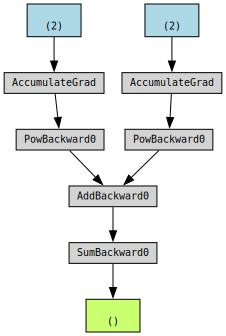

In [37]:
make_dot(s)


### Activity 4

1.In the above example:

a. What happens to the derivatives w.r.t inputs if we remove `requires_grad=True` from $y$?

b. After running the code through once, run again steps 2 and 3? Explain the values you see for the gradients.
Look in Section 2.5.1 to see what we should add in step 2 to reset the gradients.


2.What is the derivative of $y = 2\mathbf{x}^{\top}\mathbf{x}$ with respect to the column vector $\mathbf{x}$?
Now study and repeat the toy example in Section 2.5.1. relating to computing the derivative for this function.

3.Work through the notebooks accompanying the text for Section 2.5.2.(Backward for non-scalar variables), and Section 2.5.3. (Detaching computation).
(We will use detach when we in the gradient descent algorithm.)

In [ ]:
# 1a. y becomes a constant, so there is no derivative w.r.t y. If you remove all learnable parameters, the graph
# does not track the history of the computation of the parameters.
# b. The values of the gradients are wrong. When rerun the previous results are accumulated.
# Reset gradients with <object>.grad.zero_() before calling .backward()

# 2. the derivative w.r.t vector x is 4x. (See Section 2.4.3 p70)


### Activity 5

The aim is understand the function in Section 2.5.4 and serves as a review of loops.

The code below is a simplified version of the function in Section 2.5.4

1.Without running the code, what is the output that will be displayed? Verify by running the program.
If you can't figure out what the code is doing, use Python Tutor to break down the steps. (Paste the code into [Python Tutor](https://pythontutor.com/python-debugger.html#mode=edit)).

2.Now analyse the program in Section 2.5.4. (The documentation for `norm` recommends replacing it by `torch.linalg.vector_norm`. Does it matter to replace `b.sum()` by `b`?)

In [38]:
def f(a):
    b = a * 2
    while abs(b) < 4:
        b = b * 2
    if b > 0:
        c = b
    else:
        c = 10 * b
    return c

a = -2.0
d = f(a)
print(d)

-40.0


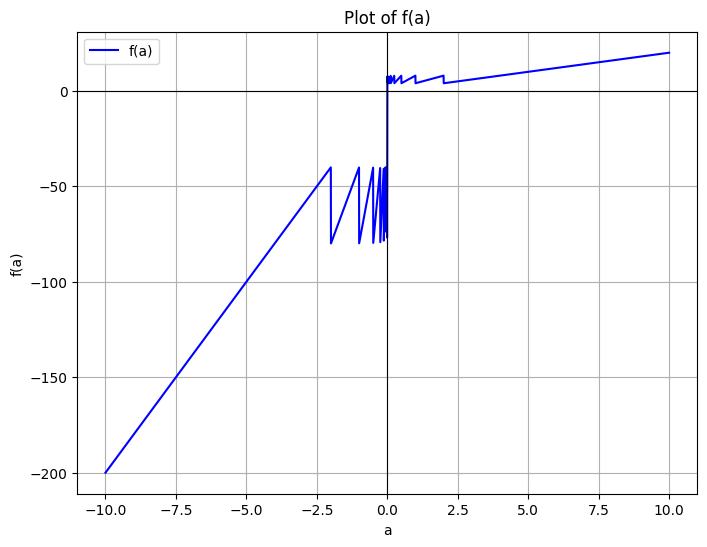

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Generate values for a
a_values = np.linspace(-10, 10, 4000)
f_values = np.array([f(a) for a in a_values])
grad_values = np.gradient(f_values,a_values)

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(a_values, f_values, label='f(a)', color='blue')
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)
plt.title('Plot of f(a)')
plt.xlabel('a')
plt.ylabel('f(a)')
plt.grid(True)
plt.legend()
plt.show()


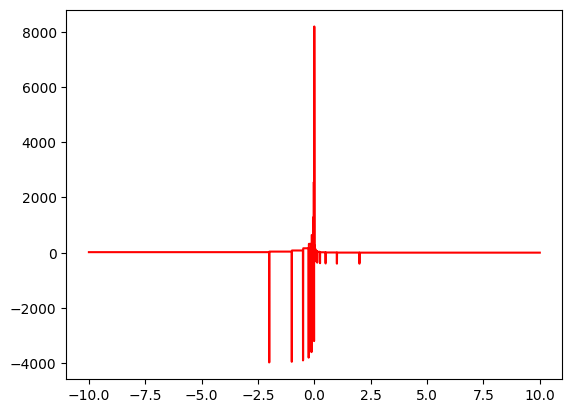

In [40]:
plt.plot(a_values, grad_values, label='grad', color='red')
plt.show()

In [41]:
a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()
print(a, d)
print(a.grad)
print(a.grad == d/a)

tensor(-0.6597, requires_grad=True) tensor(-52.7750, grad_fn=<MulBackward0>)
tensor(80.)
tensor(True)


In [42]:
a = torch.tensor([2.0], requires_grad=True)
d = f(a)
d.backward()
print(a, d)
print(a.grad)
print(a.grad == d/a)

tensor([2.], requires_grad=True) tensor([4.], grad_fn=<MulBackward0>)
tensor([2.])
tensor([True])


In [43]:
a = torch.tensor([-0.5], requires_grad=True)
d = f(a)
d.backward()
print(a, d)
print(a.grad)
print(a.grad == d/a)

tensor([-0.5000], requires_grad=True) tensor([-40.], grad_fn=<MulBackward0>)
tensor([80.])
tensor([True])


The insight is that, auto-differentiation works for python control flow. You could check the documentation if you are interested.

# More examples

In [44]:
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [45]:
x.requires_grad_(True)
x.grad  # The default value is None

In [46]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [47]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [48]:
x.grad == 4 * x

tensor([True, True, True, True])

In [49]:
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [50]:
y.backward()
x.grad

tensor([2., 2., 2., 2.])

In [51]:
x.grad.zero_()
y = x * x
u = y.detach() # u has the same value with y, while u is not in any computation graph (thus is a constant)
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [52]:
print(u)
print(y)

tensor([0., 1., 4., 9.])
tensor([0., 1., 4., 9.], grad_fn=<MulBackward0>)


In [53]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

In [54]:
x = torch.tensor([2.0, 3.0], requires_grad=True)

y = x**2
# y.requires_grad_(True)
y.retain_grad() # for intermediate variables

z = sum(y)

In [55]:
print(x,y,z)
print(x.grad, y.grad, z.grad)

tensor([2., 3.], requires_grad=True) tensor([4., 9.], grad_fn=<PowBackward0>) tensor(13., grad_fn=<AddBackward0>)
None None None


/var/folders/15/8lcxwsvj7ql4y4cmdw2m1_y00000gn/T/ipykernel_90090/2916361433.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/build/aten/src/ATen/core/TensorBody.h:494.)
  print(x.grad, y.grad, z.grad)


In [56]:
z.backward()
print(x.grad, y.grad, z.grad)

tensor([4., 6.]) tensor([1., 1.]) None


/var/folders/15/8lcxwsvj7ql4y4cmdw2m1_y00000gn/T/ipykernel_90090/2198711337.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/build/aten/src/ATen/core/TensorBody.h:494.)
  print(x.grad, y.grad, z.grad)


# Reference

[AUTOMATIC DIFFERENTIATION WITH TORCH.AUTOGRAD](https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html)